# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
urban_ride_count = pyber_data_df[pyber_data_df["type"]=="Urban"].count()["ride_id"]
suburban_ride_count = pyber_data_df[pyber_data_df["type"]=="Suburban"].count()["ride_id"]
rural_ride_count = pyber_data_df[pyber_data_df["type"]=="Rural"].count()["ride_id"]

In [4]:
# 2. Get the total drivers for each city type
urban_driver_count = city_data_df[city_data_df["type"]=="Urban"].sum()['driver_count']
suburban_driver_count = city_data_df[city_data_df["type"]=="Suburban"].sum()['driver_count']
rural_driver_count = city_data_df[city_data_df["type"]=="Rural"].sum()['driver_count']

In [5]:
#  3. Get the total amount of fares for each city type
urban_fare_total = pyber_data_df[pyber_data_df["type"]=="Urban"].sum()['fare']
suburban_fare_total = pyber_data_df[pyber_data_df["type"]=="Suburban"].sum()['fare']
rural_fare_total = pyber_data_df[pyber_data_df["type"]=="Rural"].sum()['fare']

In [6]:
#  4. Get the average fare per ride for each city type. 
urban_fare_mean = pyber_data_df[pyber_data_df["type"]=="Urban"].groupby(["type"]).mean()['fare']
suburban_fare_mean = pyber_data_df[pyber_data_df["type"]=="Suburban"].groupby(["type"]).mean()['fare']
rural_fare_mean = pyber_data_df[pyber_data_df["type"]=="Rural"].groupby(["type"]).mean()['fare']

In [7]:
# 5. Get the average fare per driver for each city type. 
urban_fare_per_driver_mean = urban_fare_total / urban_driver_count
suburban_fare_per_driver_mean = suburban_fare_total / suburban_driver_count
rural_fare_per_driver_mean = rural_fare_total / rural_driver_count

In [8]:
#  6. Create a PyBer summary DataFrame. 
data_urban = pd.DataFrame({'Total Rides': urban_ride_count, 'Total Drivers': urban_driver_count, 'Total Fares': urban_fare_total, 'Average Fare per Ride': urban_fare_mean, 'Average Fare per Driver': urban_fare_per_driver_mean})
data_suburban = pd.DataFrame({'Total Rides': suburban_ride_count, 'Total Drivers': suburban_driver_count, 'Total Fares': suburban_fare_total, 'Average Fare per Ride': suburban_fare_mean, 'Average Fare per Driver': suburban_fare_per_driver_mean})
data_rural = pd.DataFrame({'Total Rides': rural_ride_count, 'Total Drivers': rural_driver_count, 'Total Fares': rural_fare_total, 'Average Fare per Ride': rural_fare_mean, 'Average Fare per Driver': rural_fare_per_driver_mean})

pyber_summary_df = pd.DataFrame( )
pyber_summary_df = pyber_summary_df.append(data_rural)
pyber_summary_df = pyber_summary_df.append(data_suburban)
pyber_summary_df = pyber_summary_df.append(data_urban)

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
merged_df = pd.DataFrame(pyber_data_df).groupby(['type', 'date']).sum()['fare']

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
merged_df = merged_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

piv_table = merged_df.pivot(index="date", columns="type", values="fare")
piv_table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_ranged_df = piv_table.loc['2019-01-01':'2019-04-29']
date_ranged_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
date_ranged_df.index = pd.to_datetime(date_ranged_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
date_ranged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_sum_week = date_ranged_df.resample("W").sum()
fares_sum_week.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


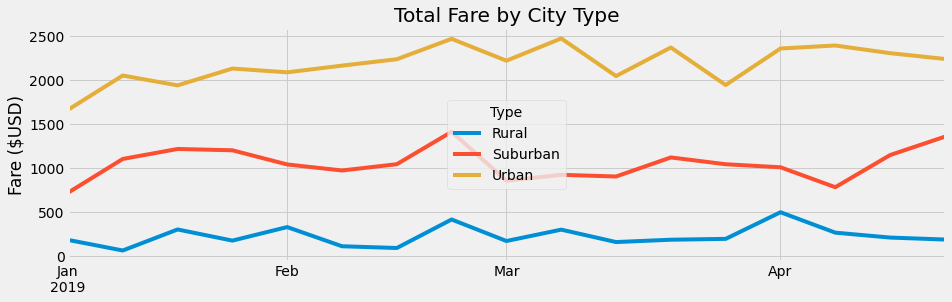

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fares_sum_week.plot(
    figsize=(14,4),
    title="Total Fare by City Type",
    ylabel="Fare ($USD)",
    xlabel=""
)
plt.legend(title="Type", loc="center")

# Save the graph
plt.savefig("analysis/Total_Fare_by_City_Type.png")